In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/PASCAL_VOC_2012.zip","r") as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top = False)
# from keras.applications import VGG16
# base_model = VGG16(weights="imagenet", include_top=False)

print(base_model.summary())

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(20, activation ='softmax')(x)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 dense
21 dense_1
22 dense_2
23 dense_3
24 dense_4


In [ ]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 dense
21 dense_1
22 dense_2
23 dense_3
24 dense_4


In [ ]:
for layer in model.layers[:18]:
  layer.trainable = False

In [ ]:
for layer in model.layers[18:]:
  layer.trainable = True

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/pascal voc2012/JPEGImages.zip","r") as zip_ref:
    zip_ref.extractall("/content/images")

In [ ]:
import pickle 
import glob

with open('/content/drive/My Drive/pascal voc2012/labels_with_foldername.txt','rb')as fp:
  labels_fname = pickle.load(fp)

In [ ]:
CLASSES = np.unique(np.asarray(labels_fname[:,1]))
CLASSES

array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
       'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
       'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
      dtype='<U11')

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/PASCAL_VOC_2012', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True,
                                                   classes =(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
       'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
       'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'])
                                                    )

Found 17125 images belonging to 20 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 6)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/6
535/535 [==============================] - 99s 186ms/step - loss: 1.1011 - accuracy: 0.7001
Epoch 2/6
535/535 [==============================] - 96s 179ms/step - loss: 0.8032 - accuracy: 0.7598
Epoch 3/6
535/535 [==============================] - 96s 179ms/step - loss: 0.6964 - accuracy: 0.7864
Epoch 4/6
535/535 [==============================] - 96s 179ms/step - loss: 0.6290 - accuracy: 0.8046
Epoch 5/6
535/535 [==============================] - 95s 178ms/step - loss: 0.5474 - accuracy: 0.8213
Epoch 6/6
535/535 [==============================] - 96s 179ms/step - loss: 0.4725 - accuracy: 0.8409


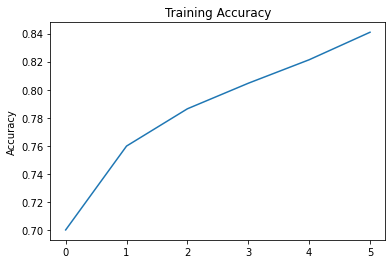

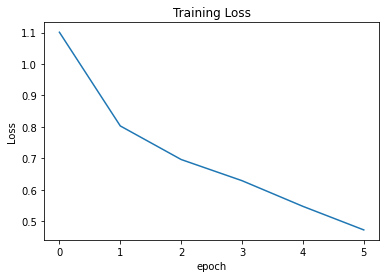

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

#Evaluate the Model :TEST ACCURACY

In [ ]:
test_images = []
for i in CLASSES:
  count=0
  for j in glob.glob('/content/PASCAL_VOC_2012/{}/*.jpg'.format(i)):
    test_images.append(j)
    test_images.append(i)
    count+=1
    if count > 50:
      break

In [ ]:
test_images = np.asarray(test_images).reshape((-1,2))

array([['/content/PASCAL_VOC_2012/aeroplane/2008_001546.jpg',
        'aeroplane'],
       ['/content/PASCAL_VOC_2012/aeroplane/2010_004855.jpg',
        'aeroplane'],
       ['/content/PASCAL_VOC_2012/aeroplane/2010_002577.jpg',
        'aeroplane'],
       ...,
       ['/content/PASCAL_VOC_2012/tvmonitor/2010_004503.jpg',
        'tvmonitor'],
       ['/content/PASCAL_VOC_2012/tvmonitor/2010_000705.jpg',
        'tvmonitor'],
       ['/content/PASCAL_VOC_2012/tvmonitor/2008_004004.jpg',
        'tvmonitor']], dtype='<U52')

In [ ]:
import matplotlib.pyplot as plt
pred = []
for i in test_images[:,0]:
  Sample_Image = tf.keras.preprocessing.image.img_to_array(plt.imread(i))
  Sample_Image = np.expand_dims(Sample_Image, axis = 0)
  Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
  predictions = model.predict(Sample_Image)
  pred.append(predictions)
# print('Predictions:', predictions)

In [ ]:
test_labels = []
for label in (test_images[:,1]):
  # test_labels.append(np.argmax(CLASSES[]))
  test_labels.append(label)
test_labels = np.asarray(test_labels).reshape((-1,1))
test_labels


array([['aeroplane'],
       ['aeroplane'],
       ['aeroplane'],
       ...,
       ['tvmonitor'],
       ['tvmonitor'],
       ['tvmonitor']], dtype='<U11')

In [ ]:
test_pred = []
for i in pred:
  test_pred.append(CLASSES[np.argmax(i)])

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix ,plot_confusion_matrix
print(classification_report(test_labels,test_pred, target_names=CLASSES))

              precision    recall  f1-score   support

   aeroplane       0.94      0.90      0.92        51
     bicycle       0.68      0.82      0.74        51
        bird       0.91      0.98      0.94        51
        boat       0.98      0.78      0.87        51
      bottle       0.97      0.65      0.78        51
         bus       0.96      0.84      0.90        51
         car       0.84      0.73      0.78        51
         cat       0.70      0.84      0.77        51
       chair       0.56      0.55      0.55        51
         cow       0.96      0.84      0.90        51
 diningtable       0.91      0.20      0.32        51
         dog       0.94      0.59      0.72        51
       horse       0.93      0.73      0.81        51
   motorbike       0.93      0.25      0.40        51
      person       0.23      0.94      0.37        51
 pottedplant       0.91      0.41      0.57        51
       sheep       0.79      0.94      0.86        51
        sofa       0.54    

#EVALUATION: Binary Classification for Bus

In [ ]:
conf_matrix = confusion_matrix(test_labels,test_pred, labels = (['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
       'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
       'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']))

In [ ]:
print("CLASS BUS Accuracy:{}%".format(conf_matrix[5,5]*100/51))

CLASS BUS Accuracy:84.31372549019608%
